In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## EDA

:)

"SBP" typically stands for "systolic blood pressure," which is the highest pressure reached in the arteries during each heartbeat.

"DBP" typically stands for "diastolic blood pressure," which is the lowest pressure reached in the arteries between heartbeats.

"STAI": State-Trait Anxiety Inventory score

"PM2.5": concentration of fine particulate matter (particles with diameter of 2.5 micrometers or less) in the air

In [64]:
%ls

Habitat Stress Mattia.ipynb         habitat_random_forest_model.joblib
Stress Slepp Mattia.ipynb           habitat_water_EDA.ipynb
anxiety.ipynb                       heart_disease.ipynb
habitat_energy_EDA.ipynb


In [65]:
df = pd.read_csv('../datasets/habitat/Habitat_Stress.csv')
df.head()

,ID,Setting,Post,SBP,DBP,STAI,PM2.5,Temp,Rh,CO2,...,Stresslevel,Stress_or_not_after_test,Which_part_first,Which_part_stress_most,VR_experience,Experience_Nature,Scence_1,Scence_2,Scence_3,Scence_4
0,1,1,0,118,76,,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
1,1,1,1,115,74,,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
2,1,1,2,115,76,2.833,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
3,1,1,3,113,76,2.833,0.0,19.5,39.8,658,...,2,Yes,1,2,Less than 3 times,4,4.0,3.0,1.0,2.0
4,2,2,0,101,66,,0.0,21.7,37.0,640,...,1,No,2,1,More than 10 times,3,3.0,4.0,1.0,2.0


In [66]:
#Stresslevel takes values from 1 to 4. I though that 1,2 values of "stresslevel" indicated 
#Stress_or_not_after_test == "No", while for 3,4 Stress_or_not_after_test == "Yes"
print("yes:", (df[df["Stresslevel"]>=3]["Stress_or_not_after_test"]=="Yes").sum())
print("no:", (df[df["Stresslevel"]>=3]["Stress_or_not_after_test"]=="No").sum())
#apparently this is not the case, weird but let's forget about Stress_or_not_after_test and focus only on Stresslevel

yes: 100
no: 44


In [67]:
df.columns[16:].values

array(['Caffinebeverage', 'Stresslevel', 'Stress_or_not_after_test',
       'Which_part_first', 'Which_part_stress_most', 'VR_experience',
       'Experience_Nature', 'Scence_1', 'Scence_2', 'Scence_3',
       'Scence_4'], dtype=object)

In [68]:
df = df.drop(columns=["Setting", "Post", "STAI"])
print(df.columns[15:].values)
df = df.drop(columns= df.columns[15:].values)
df.head()

['Stress_or_not_after_test' 'Which_part_first' 'Which_part_stress_most'
 'VR_experience' 'Experience_Nature' 'Scence_1' 'Scence_2' 'Scence_3'
 'Scence_4']


,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,ethnic,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel
0,1,118,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
1,1,115,74,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
2,1,115,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
3,1,113,76,0.0,19.5,39.8,658,26,Male,White/Caucasian,Very good,No,No,No,2
4,2,101,66,0.0,21.7,37.0,640,30,Female,Multiracial,Excellent,No,Yes,No,1


In [69]:
df.describe()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Stresslevel
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.50000,115.692500,75.995000,0.324000,21.344000,36.742000,715.970000,29.190000,2.200000
std,28.90222,12.378247,10.838064,0.551893,1.150641,9.943753,120.597963,11.794986,0.917663
min,1.00000,83.000000,51.000000,0.000000,18.800000,20.000000,283.000000,18.000000,1.000000
25%,25.75000,107.750000,70.000000,0.000000,20.475000,29.100000,634.500000,21.000000,1.750000
50%,50.50000,114.000000,75.000000,0.000000,21.400000,37.000000,700.500000,26.000000,2.000000
75%,75.25000,122.000000,81.000000,0.200000,22.100000,41.925000,789.000000,33.250000,3.000000
max,100.00000,175.000000,123.000000,3.000000,23.600000,60.600000,1117.000000,73.000000,4.000000


In [70]:
#make stress level range [0,3] instead of [1,4]. This is done to match the stress sleep dataset
df["Stresslevel"]-=1

### Mapping non numerical variables

sex

In [71]:
df["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [72]:
df["Sex"] = df["Sex"].map({'Male': 1, 'Female': 0})

In [73]:
df["Sex"].unique()

array([1, 0])

ethnic

In [74]:
df["ethnic"].value_counts()

White/Caucasian              164
Asian                         96
Black or African American     68
Multiracial                   44
Latino                        24
No response                    4
Name: ethnic, dtype: int64

In [75]:
df = pd.get_dummies(df, columns=['ethnic'])
df.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel,ethnic_Asian,ethnic_Black or African American,ethnic_Latino,ethnic_Multiracial,ethnic_No response,ethnic_White/Caucasian
0,1,118,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
1,1,115,74,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
2,1,115,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
3,1,113,76,0.0,19.5,39.8,658,26,1,Very good,No,No,No,1,0,0,0,0,0,1
4,2,101,66,0.0,21.7,37.0,640,30,0,Excellent,No,Yes,No,0,0,0,0,1,0,0


Healthcondition

In [76]:
#won't create dummy variables, instead assign increasing numbers coz we are interested in the order
df["Healthcondition"].unique()

array(['Very good', 'Excellent', 'Good', 'Fair'], dtype=object)

In [77]:
#we need to map strings to numbers
df["Healthcondition"] = df["Healthcondition"].map({'Excellent': 3, 'Very good': 2, 'Good': 1, 'Fair': 0})

In [78]:
df["Healthcondition"].unique()

array([2, 3, 1, 0])

medicine

In [79]:
df["Medicine"].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df["Medicine"] = df["Medicine"].map({'Yes': 1, 'No': 0})

In [81]:
df["Medicine"].unique()

array([0, 1])

sleep

In [82]:
df["Sleep"] = df["Sleep"].map({'Yes': 1, 'No': 0})

caffeine beverage

In [83]:
df["Caffinebeverage"] = df["Caffinebeverage"].map({'Yes': 1, 'No': 0})

In [84]:
df.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Sex,Healthcondition,Medicine,Sleep,Caffinebeverage,Stresslevel,ethnic_Asian,ethnic_Black or African American,ethnic_Latino,ethnic_Multiracial,ethnic_No response,ethnic_White/Caucasian
0,1,118,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
1,1,115,74,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
2,1,115,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
3,1,113,76,0.0,19.5,39.8,658,26,1,2,0,0,0,1,0,0,0,0,0,1
4,2,101,66,0.0,21.7,37.0,640,30,0,3,0,1,0,0,0,0,0,1,0,0


Check for missing values in the dataset


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                400 non-null    int64  
 1   SBP                               400 non-null    int64  
 2   DBP                               400 non-null    int64  
 3   PM2.5                             400 non-null    float64
 4   Temp                              400 non-null    float64
 5   Rh                                400 non-null    float64
 6   CO2                               400 non-null    int64  
 7   Age                               400 non-null    int64  
 8   Sex                               400 non-null    int64  
 9   Healthcondition                   400 non-null    int64  
 10  Medicine                          400 non-null    int64  
 11  Sleep                             400 non-null    int64  
 12  Caffineb

In [86]:
df.isna().sum()

ID                                  0
SBP                                 0
DBP                                 0
PM2.5                               0
Temp                                0
Rh                                  0
CO2                                 0
Age                                 0
Sex                                 0
Healthcondition                     0
Medicine                            0
Sleep                               0
Caffinebeverage                     0
Stresslevel                         0
ethnic_Asian                        0
ethnic_Black or African American    0
ethnic_Latino                       0
ethnic_Multiracial                  0
ethnic_No response                  0
ethnic_White/Caucasian              0
dtype: int64

In [87]:
df_num = df.iloc[:, list(range(8)) + [13]]
df_num.head()

,ID,SBP,DBP,PM2.5,Temp,Rh,CO2,Age,Stresslevel
0,1,118,76,0.0,19.5,39.8,658,26,1
1,1,115,74,0.0,19.5,39.8,658,26,1
2,1,115,76,0.0,19.5,39.8,658,26,1
3,1,113,76,0.0,19.5,39.8,658,26,1
4,2,101,66,0.0,21.7,37.0,640,30,0


Visualize the distribution of the variables using histograms or density plots.

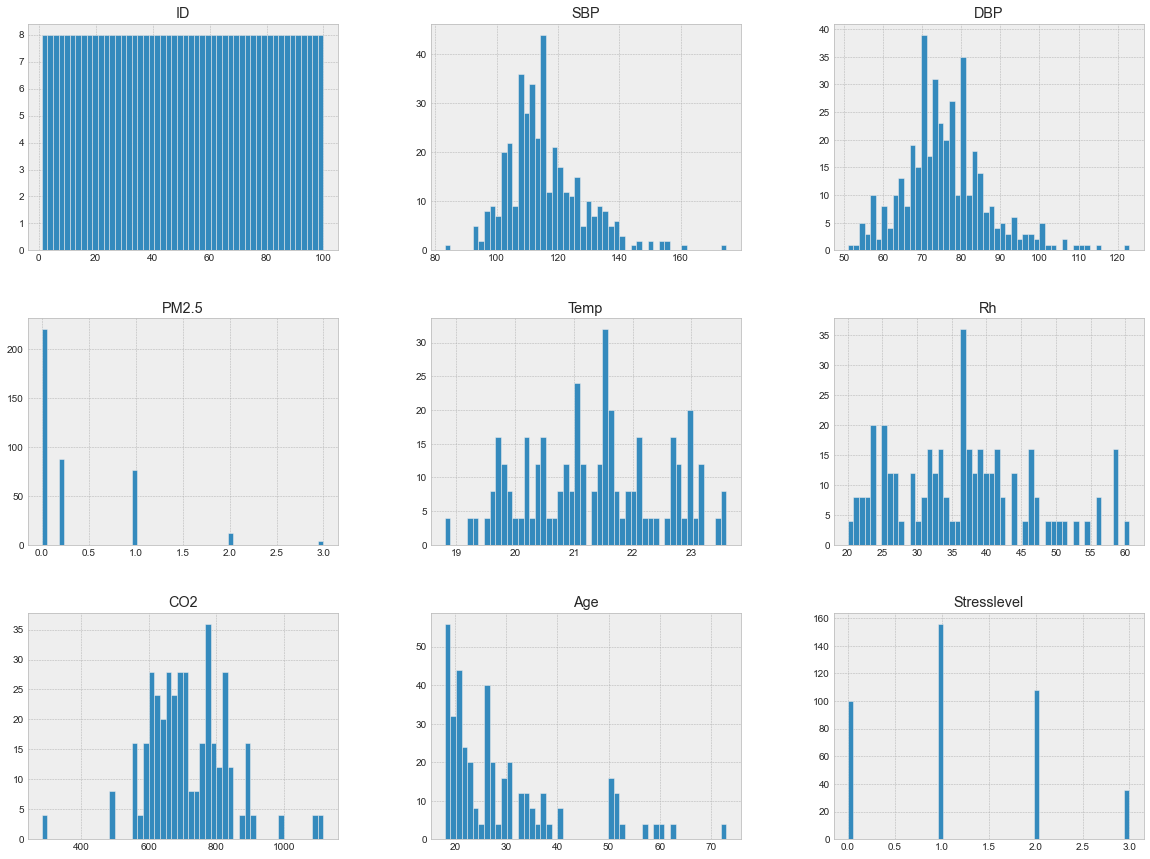

In [88]:
df_num.hist(bins=50, figsize=(20, 15))

plt.show()

Visualize the relationship between the continuous variables and the categorical target variable using boxplots or violin plots

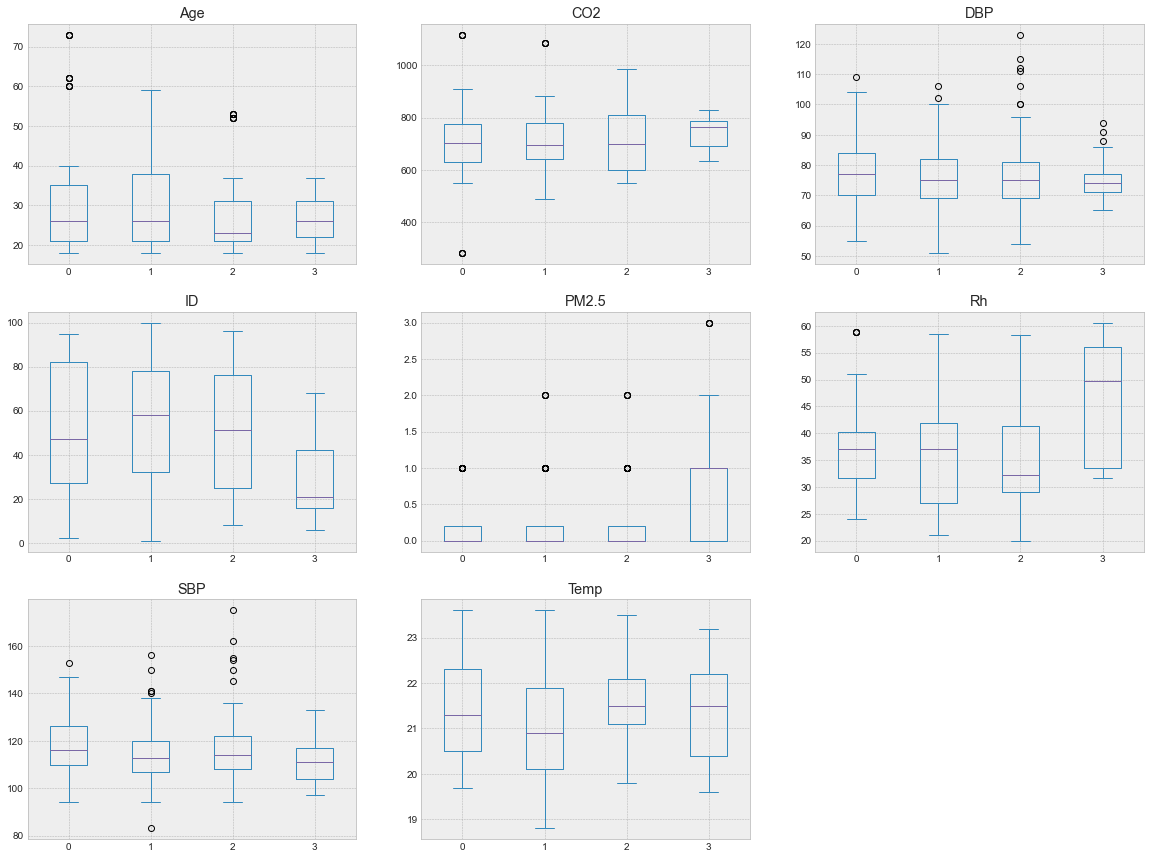

In [89]:
# create boxplots for each continuous variable by target variable
df_num.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(20, 15), by='Stresslevel')
plt.show()

Check for any correlations between the continuous variables using a correlation matrix heatmap.

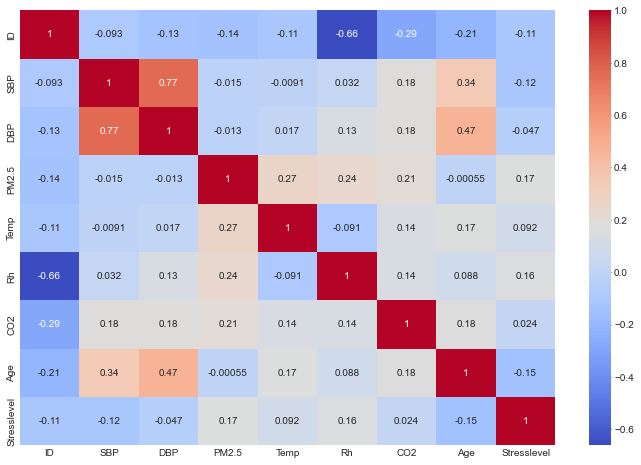

In [90]:
corr_matrix = df_num.corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

No significant correlations

## Model Building

training and testing (scale features)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print(df.columns)

df = df.rename(columns={'ethnic_Black or African American': 'ethnic_Black'})
df = df.rename(columns={'ethnic_No response': 'ethnic_No'})
df = df.rename(columns={'ethnic_White/Caucasian': 'ethnic_Caucasian'})



X = df.iloc[:, [n for n in range(20) if n != 13]] #take all variables a part from target (stress) that is at index 13

print(X.columns)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Index(['ID', 'SBP', 'DBP', 'PM2.5', 'Temp', 'Rh', 'CO2', 'Age', 'Sex',
       'Healthcondition', 'Medicine', 'Sleep', 'Caffinebeverage',
       'Stresslevel', 'ethnic_Asian', 'ethnic_Black', 'ethnic_Latino',
       'ethnic_Multiracial', 'ethnic_No', 'ethnic_Caucasian'],
      dtype='object')
Index(['ID', 'SBP', 'DBP', 'PM2.5', 'Temp', 'Rh', 'CO2', 'Age', 'Sex',
       'Healthcondition', 'Medicine', 'Sleep', 'Caffinebeverage',
       'ethnic_Asian', 'ethnic_Black', 'ethnic_Latino', 'ethnic_Multiracial',
       'ethnic_No', 'ethnic_Caucasian'],
      dtype='object')


### Random Forest (best model)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

Accuracy of random forest: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        11

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



#### save the model

In [101]:
import joblib

filename = '../backend/machine_learning/model_data/habitat_random_forest_model.joblib'
joblib.dump(rf, filename)

['../backend/machine_learning/model_data/habitat_random_forest_model.joblib']

#### load the model

In [102]:
# load the saved model
loaded_model = joblib.load(filename)

# use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)